# Lab 7 - Discover associations between e-commerce purchases
*© 2023 Colin Conrad*


Data mining is the process of knowledge discovery from large data sets, and is perhaps the defining task of a data scientist. Data mining techniques include everything that you have learned so far: data processing, data structures and descriptive analytics and summarization. In addition, data mining may also employ classification and association rule learning, two techniques borrowed from machine learning. Unfortunately we will not have the ability to cover machine learning in depth in this course, but that won't stop us from employing it in our analysis!


**This week, we will achieve the following objectives:**
- Analyze outliers
- Detect patterns among e-commerce transactions
- Implement association rule mining

# Case: The Online Retail Data Set
This week's lab is based on the [Online Retail Data Set](https://archive.ics.uci.edu/ml/datasets/online+retail) provided by Dr. Daqing Chen through the UCI Machine Learning Repository. The dataset consists of roughly 500k transactions from a British e-commerce company which occurred between 01/12/2010 and 09/12/2011. The company is a gift and confectionary company and mainly sells to retailers.

When conducting data mining and machine learning analysis it is often important to have large datasets. The University of California Machine Learning Repository is a useful resource for finding datasets which are suited to these purposes. To learn more, visit their website: https://archive.ics.uci.edu/ml/index.php

# Objective 1: Analyze Outliers
The ultimate goal of data mining is to generate insights from the data. As such, outlier detection is particularly important. Outliers often considerably account for an organization's performance and this e-commerce company is no exception.

We will start by importing pandas and matplotlib so that we can do some visual analytics. We will specify a few more details related to encoding and data types so that we don't run into trouble.

In [1]:
import pandas as pd #import pandas as an object pd

import matplotlib.pyplot as plt

ec = pd.read_csv('Lab9_OnlineRetail.csv', encoding="ISO-8859-1")
ec.head() #see the first five entries

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 8:26,3.39,17850.0,United Kingdom


This dataset consists of 541909 records and 8 columns. This is the largest dataset that we have explored so far, but still pretty far from 'big data'.

In [2]:
ec.shape

(541909, 8)

Let's visualize the `UnitPrice` to look for outliers in that column. Right away we can see that there are a small number of transactions which have over 1000 pounds in price. 

<AxesSubplot:title={'center':'Transaction price over time'}, xlabel='InvoiceDate'>

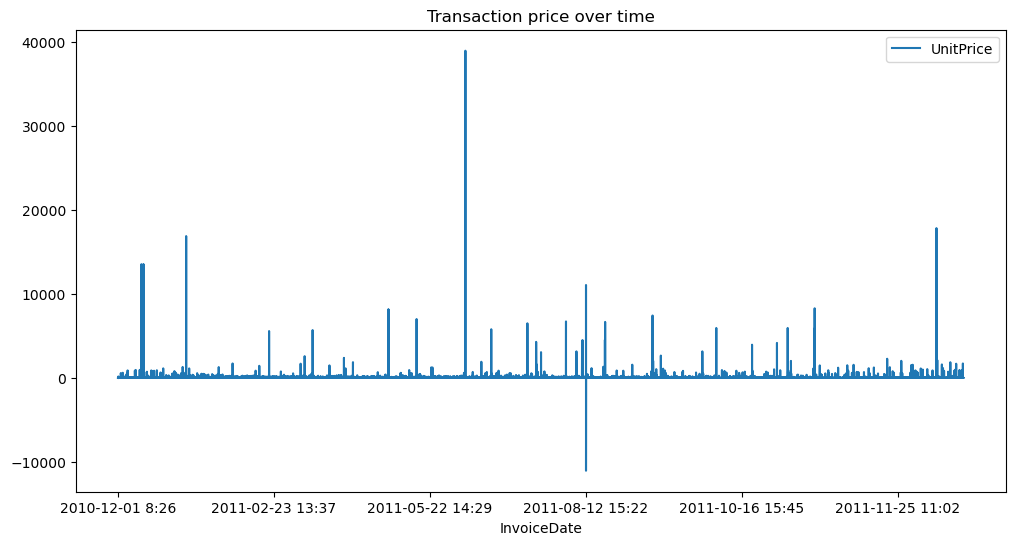

In [3]:
ec.plot(x='InvoiceDate', y='UnitPrice', figsize=(12,6), title='Transaction price over time')

Let's retrieve the subset of transactions which have over 1000 pounds as the UnitPrice. We could also learn that there are 122 transactions by using `.describe()`, which you can try if you would like! 

In [4]:
ec_outliers = ec[
                    (ec['UnitPrice'] > 1000) |
                    (ec['UnitPrice'] < -1000)
                ]

ec_outliers.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
15016,C537630,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:04,13541.33,NaN,United Kingdom
15017,537632,AMAZONFEE,AMAZON FEE,1,2010-12-07 15:08,13541.33,NaN,United Kingdom
16232,C537644,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:34,13474.79,NaN,United Kingdom
16313,C537647,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:41,5519.25,NaN,United Kingdom
16356,C537651,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:49,13541.33,NaN,United Kingdom


In [5]:
ec_outliers.describe()

,Quantity,UnitPrice,CustomerID
count,122.000000,122.000000,46.000000
mean,-0.090164,3759.296393,14173.804348
std,1.012354,5174.857618,1744.051676
min,-2.000000,-11062.060000,12503.000000
25%,-1.000000,1273.495000,12744.000000
50%,-1.000000,2043.085000,14096.000000
75%,1.000000,5062.682500,15301.250000
max,1.000000,38970.000000,18102.000000


What type of transactions are these? We can use the `.unique()` method to determine the number of unique values in the `Description` column. It is clear that these consist of overhead costs which were recorded as transactions in the data. Let's dig into the differences between these categories.

In [6]:
ec_outliers['Description'].unique()

array(['AMAZON FEE', 'Manual', 'Bank Charges', 'Discount', 'POSTAGE',
       'DOTCOM POSTAGE', 'Adjust bad debt', 'CRUK Commission'],
      dtype=object)

### Analyze outliers by description group
In the previous labs, we learned about the `groupby()` method which can be used to group data by a nominal value. `Description` is one such value. By calculating the sum of unit price for each value, we can compare expenses between the categories. It is clear that `AMAZON FEE` is a considerable source of revenue for this company.

One immediate question I would have for the executives at this company is whether this represented a revenue or an expense. It seems strange that they are recorded as revenues; it is possible that they represent sales which were made on Amazon. However, this does not account for the fact that there are other fees represented as revenues (e.g. DOTCOM POSTAGE).

<AxesSubplot:title={'center':'Total fees paid by outlier fee type'}, xlabel='Description'>

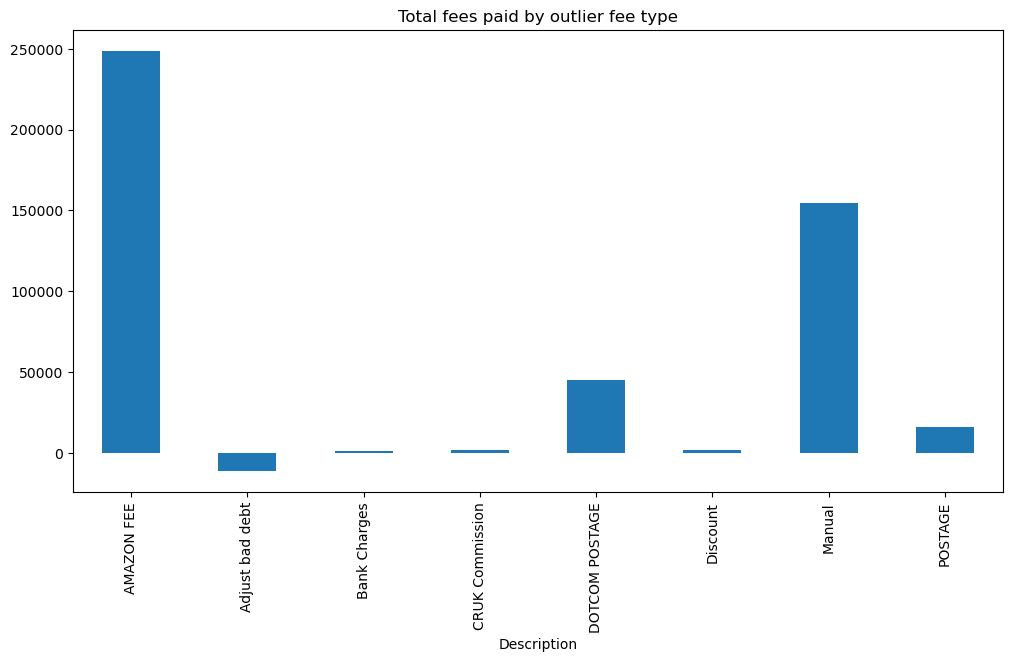

In [7]:
out_group = ec_outliers.groupby('Description')
out_group['UnitPrice'].sum().plot.bar(figsize=(12,6), title='Total fees paid by outlier fee type')

## Challenge Question 1 (2 points)
Though it is clear that Amazon Fees constitute the largest fee segment among the outliers, it is not clear whether any one Amazon fee was responsible for these expenses. Write code that provides the transaction which had the highest UnitPrice value.

- Retrieve the data of amazon fee <b>(ec.StockCode == 'AMAZONFEE')</b>
- Sort the values by <b> UnitPrice</b>
- Print the values


In [8]:
Amazon = ec[ec.StockCode == 'AMAZONFEE']

Amazon_sorted = Amazon.sort_values(by='UnitPrice', ascending=False)
Amazon_sorted

#sort the values by UnitPrice
#print values

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
524602,C580605,AMAZONFEE,AMAZON FEE,-1,2011-12-05 11:36,17836.46,NaN,United Kingdom
43702,C540117,AMAZONFEE,AMAZON FEE,-1,2011-01-05 9:55,16888.02,NaN,United Kingdom
43703,C540118,AMAZONFEE,AMAZON FEE,-1,2011-01-05 9:57,16453.71,NaN,United Kingdom
15017,537632,AMAZONFEE,AMAZON FEE,1,2010-12-07 15:08,13541.33,NaN,United Kingdom
16356,C537651,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:49,13541.33,NaN,United Kingdom
15016,C537630,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:04,13541.33,NaN,United Kingdom
16232,C537644,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:34,13474.79,NaN,United Kingdom
524601,C580604,AMAZONFEE,AMAZON FEE,-1,2011-12-05 11:35,11586.50,NaN,United Kingdom
446533,C574902,AMAZONFEE,AMAZON FEE,-1,2011-11-07 15:21,8286.22,NaN,United Kingdom
342635,C566899,AMAZONFEE,AMAZON FEE,-1,2011-09-15 13:53,7427.97,NaN,United Kingdom


# Objective 2: Detect patterns among e-commerce transactions
With a better understanding of the `UnitPrice` outliers, it is time to analyze the main transactional data. We should start by removing the outlier data and analyzing only common transactions. We can create a subset called `ect` (e-commerce transactions) for this analysis. Let's visualize the `Quantity` column instead.

<AxesSubplot:title={'center':'Quantity over time, excluding overhead fees'}, xlabel='InvoiceDate'>

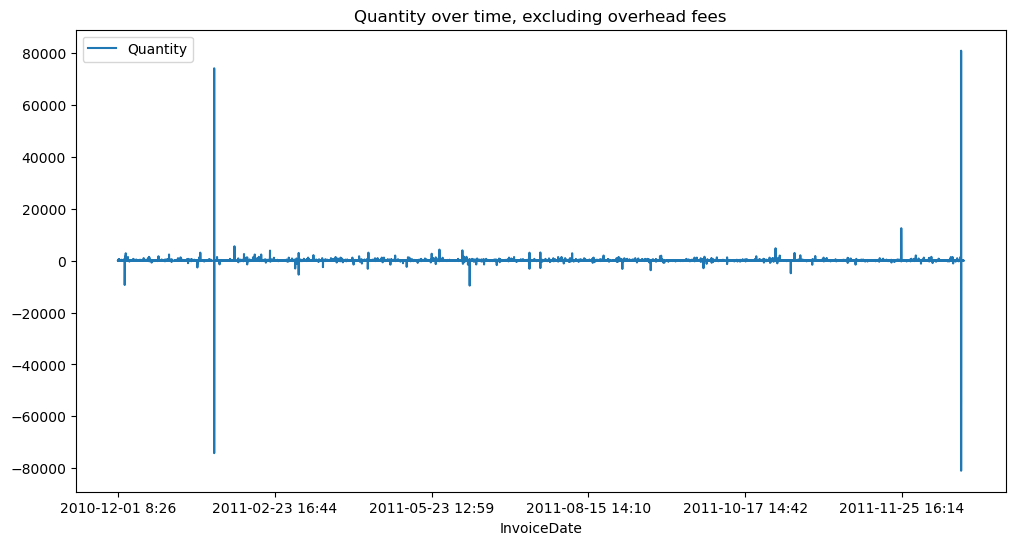

In [9]:
ect = ec[
            (ec['Description'] != 'AMAZON FEE') & 
            (ec['Description'] != 'Manual') &
            (ec['Description'] != 'Bank Charges') & 
            (ec['Description'] != 'Discount') &
            (ec['Description'] != 'POSTAGE') & 
            (ec['Description'] != 'DOTCOM POSTAGE') &
            (ec['Description'] != 'Adjust bad debt') & 
            (ec['Description'] != 'CRUK Commission')
        ]

ect.plot(x='InvoiceDate', y='Quantity', figsize=(12,6), title='Quantity over time, excluding overhead fees')

<h2> Challenge Question 2 </h2>

Retrieve orders with over 5000 quantity (or negative 5000 quantity) and investigate what these outliers are?

In [10]:
#edit code here
ect_outliers = ec[
                    (ec['Quantity'] > 5000) |
                    (ec['Quantity'] < -5000)
                ]

ect_outliers.head()
#print

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
4287,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,2010-12-02 14:23,0.03,15838.0,United Kingdom
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01,1.04,12346.0,United Kingdom
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17,1.04,12346.0,United Kingdom
74614,542504,37413,NaN,5568,2011-01-28 12:03,0.00,NaN,United Kingdom
115818,546152,72140F,throw away,-5368,2011-03-09 17:25,0.00,NaN,United Kingdom


<h2> Challenge Question 3 </h2>

Visualize the `Quantity` to look for outliers in that column. Edit the code below to see the small number of transactions which have over 5000 pounds in price. 


<AxesSubplot:title={'center':'Quantity over time, excluding overhead fees'}, xlabel='InvoiceDate'>

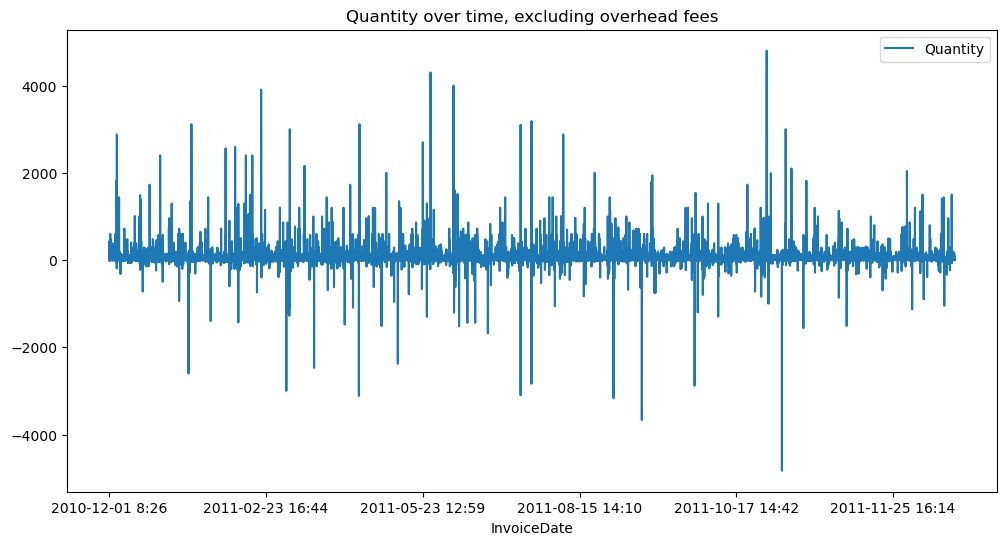

In [13]:
ectc = ect[
            (ect['Quantity'] < 5000) &
            (ect['Quantity'] > -5000) 
#             (ect['UnitPrice'] > 5000)
    
         ]

ectc.plot(x='InvoiceDate', y='Quantity', figsize=(12,6), title='Quantity over time, excluding overhead fees')

#Write code here to visualize the Quantity over time, excluding overhead fees and extremen values


### Creating a calculated value
While `Quantity` and `UnitPrice` are valuable data, in order to assess the value of each transaction it would be valuable to know the `TransactionValue` which is the `UnitPrice` multiplied by `Quantity`. With this data we would be able to assess the revenue generated for each invoice or customer. However, our dataframe does not currently carry this calculated value.

In order to create a calculated value in Pandas we must iterate through each row of the dataframe. Pandas supports a method called `.apply()` which is designed for this task. Using `.apply()` we can apply simple functions to columns or rows of the dataframe to generated a calculated value. 

There are two types of functions which are supported by `.apply()`. The first are numpy functoins such as `.mean()` or `.sum()`. The second is called a `lambda`, which is sort of like a mini function in Python. In the code below we apply a `lambda` to calculate the `TransactionValue`.

**Note:** If you don't understand lambdas, don't worry about it, it is here mostly so that you can see it in action. Also, Jupyter may throw a waning at you for using the code below, this is because we made changes to the dataframe that the lambda references, which is not a best practice.

In [14]:
ectc['TransactionValue'] = ectc.apply(lambda row: row['UnitPrice'] * row['Quantity'], axis=1)

/var/folders/w7/fy0rr9dj27g6rb8_yvybs8140000gn/T/ipykernel_44595/2616320542.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ectc['TransactionValue'] = ectc.apply(lambda row: row['UnitPrice'] * row['Quantity'], axis=1)


This will give us a new row called TransactionValue, which we can use for analysis.

In [15]:
ectc.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TransactionValue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 8:26,3.39,17850.0,United Kingdom,20.34


### Grouping Customers
By again using `.groupby()` we can now analyze the sales made to each customer. The code below grabs the `customer_sales`, which is the sum of `TransactionValue` for each customer and orders them from largest to smallest.

In [16]:
cust_group = ectc.groupby('CustomerID')
customer_sales = cust_group['TransactionValue'].sum().sort_values(ascending=False)

We can now visualize the data. Using a simple line plot we will see that there is a clear exponential relationship where a handful of customers account for most of the revenue. 

<AxesSubplot:title={'center':'Customer sales distribution'}, xlabel='CustomerID'>

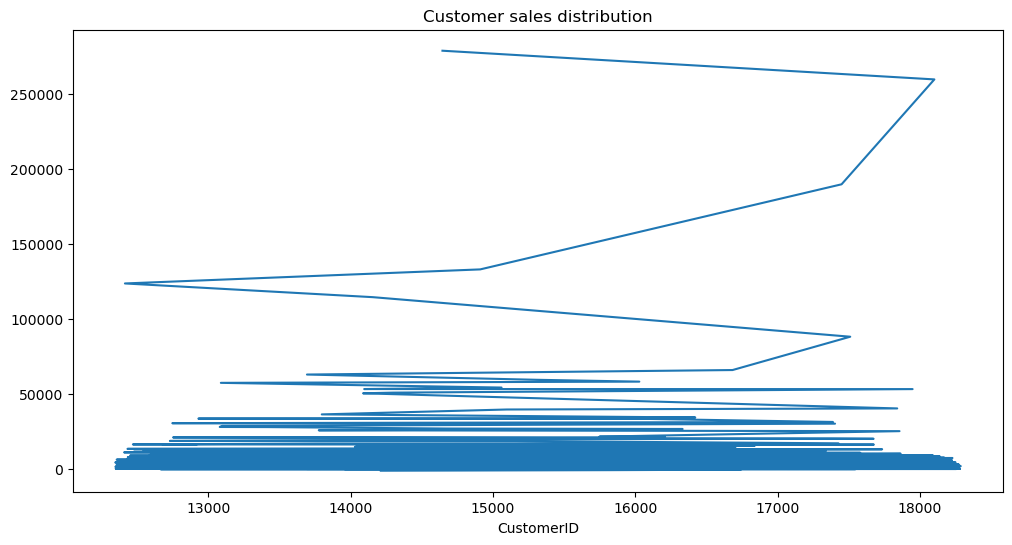

In [17]:
customer_sales.plot(figsize=(12,6), title='Customer sales distribution')

# Objective 4: Implement Association Rule Mining

The final data mining technique which is worth exploring is association rule mining. The algorithm that we will explore is called the **apriori** algorithm. 

The apriori association mining algorithm is a simple frequency item set mining algorithm, most commonly used to find associations over a transactional database. In the 1990s and early 2000s, this algorithm was used to discover a lot of data mining "gems" -- unexpected associations between purchases and behaviours. Today it is still commonly used by retailers and e-commerce companies to look at purchasing patterns. 

The algorithm looks at all of the transactions in a dataset and returns the most common associations between the items. It uses three measures: **support**, **confidence** and **lift**. Support describes the number of occurrences in the dataset. Confidence is how often the association is found to be true. Lift is the ratio of observed support to the independent observations of the items in the association. [The Wikipedia page gives a more detailed explanation](https://en.wikipedia.org/wiki/Association_rule_learning).

### Installing the Apyori Library

Before we can get started, we will need to install the apyroi library. Yes, you read that right... aPYori. Python has no shame.

In [18]:
pip install apyori

Note: you may need to restart the kernel to use updated packages.


Unfortunately, the apyori library is not designed to work with pandas easily. As such, we will go back to good old lists. *Warning* this may make you nostalgic for a better time.

In [1]:
import csv #import the csv library for loading csv type files
from apyori import apriori #import the apriori library

ec = [] # we will declare a list to store the data

with open('Lab9_OnlineRetail.csv', encoding = 'unicode_escape') as csvfile:
    datareader = csv.reader(csvfile, delimiter=',', quotechar='|') 
    for row in datareader: 
        ec.append(row)

FileNotFoundError: [Errno 2] No such file or directory: 'Lab9_OnlineRetail.csv'

As before, it's usually a good practice to see the data we are looking at. Let's see how the data is structured.

In [24]:
print(ec[4]) #prints the fifth item

['536365', '84029G', 'KNITTED UNION FLAG HOT WATER BOTTLE', '6', '2010-12-01 8:26', '3.39', '17850', 'United Kingdom']


Using the apyori library is simple. We simply call then apriori function on the dataset and it will create a bunch of associations for us. Let's do that, while saving the associations as the "associations" list. Let's print it to see what the associations look like.

In [25]:
associations = list(apriori(ec)) #use the apriori function to create associations

In [26]:
print(associations) #print the associations

[RelationRecord(items=frozenset({''}), support=0.2492664833643963, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({''}), confidence=0.2492664833643963, lift=1.0)]), RelationRecord(items=frozenset({'1'}), support=0.27377239763060285, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'1'}), confidence=0.27377239763060285, lift=1.0)]), RelationRecord(items=frozenset({'12'}), support=0.11268291782768357, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'12'}), confidence=0.11268291782768357, lift=1.0)]), RelationRecord(items=frozenset({'2'}), support=0.15101216069088963, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'2'}), confidence=0.15101216069088963, lift=1.0)]), RelationRecord(items=frozenset({'United Kingdom'}), support=0.9143178756620103, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'United Kingdom'}), confidence=

Wait! This is <u>not readable at all!</u>. By simply printing the list, we retrieved direct output from the associations. We can't use this on any sort of report! 

That said, we can sort of make out the details of the output. You can see the associations, support and confidence values. These are saved as lists within the list of associations. One way to manage this data is to only print the elements that we need, one by one. Let's loop through the results and only print the relevant data.

In [27]:
for a in associations: #loop through each association directly
    #corresponds to the list values for association, the support and the confidence.
    print("Association: " + str(list(a[0])) + ", Support: " + str(a[1]) + ", Confidence: " + str(a[2][0][2]))

Association: [''], Support: 0.2492664833643963, Confidence: 0.2492664833643963
Association: ['1'], Support: 0.27377239763060285, Confidence: 0.27377239763060285
Association: ['12'], Support: 0.11268291782768357, Confidence: 0.11268291782768357
Association: ['2'], Support: 0.15101216069088963, Confidence: 0.15101216069088963
Association: ['United Kingdom'], Support: 0.9143178756620103, Confidence: 0.9143178756620103
Association: ['', '1'], Support: 0.1383181709139894, Confidence: 0.1383181709139894
Association: ['', 'United Kingdom'], Support: 0.24653540255762027, Confidence: 0.24653540255762027
Association: ['1', 'United Kingdom'], Support: 0.2699267406026831, Confidence: 0.2699267406026831
Association: ['United Kingdom', '2'], Support: 0.14481925042903804, Confidence: 0.14481925042903804
Association: ['', 'United Kingdom', '1'], Support: 0.13803768153383403, Confidence: 0.13803768153383403


That's better. However, it also revealed another problem. We only have 10 association rules.

This was caused by the apriori functions default values. By default, it only collects support above 0.1. This is far too low for our dataset, as there is a lot of variance in the purchases. We can override the default by stating it in the function. Let's try lowering it to 0.002 ... patterns that happen at least 1000 times in our dataset (<u>warning: this may take about a minute to process on some computers</u>).

In [28]:
associations = list(apriori(ec, min_support=0.002))
print(len(associations))

765


We can once again look through these associations by looping and printing. Let's do that.

In [29]:
for a in associations:
    print("Association: " + str(list(a[0])) + ", Support: " + str(a[1]) + ", Confidence: " + str(a[2][0][2]))

Association: [''], Support: 0.2492664833643963, Confidence: 0.2492664833643963
Association: ['-1'], Support: 0.007720839253750623, Confidence: 0.007720839253750623
Association: ['-2'], Support: 0.0025742281928733553, Confidence: 0.0025742281928733553
Association: ['0'], Support: 0.0046409920466498125, Confidence: 0.0046409920466498125
Association: ['0.19'], Support: 0.0035153438762894206, Confidence: 0.0035153438762894206
Association: ['0.21'], Support: 0.002147958148031961, Confidence: 0.002147958148031961
Association: ['0.29'], Support: 0.008167407872155892, Confidence: 0.008167407872155892
Association: ['0.39'], Support: 0.015214703548559723, Confidence: 0.015214703548559723
Association: ['0.42'], Support: 0.04527135502205163, Confidence: 0.04527135502205163
Association: ['0.55'], Support: 0.014137033824804857, Confidence: 0.014137033824804857
Association: ['0.65'], Support: 0.01450609879869351, Confidence: 0.01450609879869351
Association: ['0.72'], Support: 0.002278976213762433, Co

Better still. If you scroll down, we see some interesting patterns start to emerge, such as:
<ul>
    <li>'United Kingdom', 'ASSORTED COLOUR BIRD ORNAMENT'</li>
    <li>'United Kingdom', 'WHITE HANGING HEART T-LIGHT HOLDER'</li>
    <li>'United Kingdom', '4.95', '47566', 'PARTY BUNTING'</li>
</ul>
Though interesting that some products are purchased from the UK at a certain price, it is clear that there is something missing. Typically, basket analysis is conducted <i>on baskets</i>. We seem to have output that is improperly structured for this task.

### Conduct basket analysis
One option is to restructure the data. Fortunately, we are using a programming language, so this step is relatively simple. We can create a simple script that creates a new list of baskets for association mining. The script below does this and finishes by reporting the number of basket associations produced.

In [30]:
i = 1
basket = [] #specify a list for basket items
baskets = [] #a list of baskets
invoice = ec[1][0] #a placeholder for the previous invoice number

while i < len(ec): #iterate through each item sequentially
    if ec[i][0] != invoice: #if this is a new invoice
        baskets.append(basket) #append the baskets
        basket = [] #start a new basket
    basket.append(ec[i][2]) #add this item to basket
    invoice = ec[i][0] #specify this current invoice as the new previous invoice
    i += 1 #iterate to the next item

len(baskets)

25900

As before, we can use the apriori function to create the associations and the print statement to print the results. Let's only print results that also have a confidence of greater than 50%, meaning that at least half of the time, these things are purchased together.

In [31]:
basket_associations = list(apriori(baskets, min_support=0.02))

for a in basket_associations:
    if len(a[0]) > 1: # we are only interested in baskets with more than one item in it
        if a[2][1][2] > 0.5: # confidence of at least 0.5
            print("Association: " + str(list(a[0])) + ", Support: " + str(a[1]) + ", Confidence: " + str(a[2][1][2]))

Association: ['ALARM CLOCK BAKELIKE RED ', 'ALARM CLOCK BAKELIKE GREEN'], Support: 0.024903474903474904, Confidence: 0.645
Association: ['CHARLOTTE BAG PINK POLKADOT', 'RED RETROSPOT CHARLOTTE BAG'], Support: 0.020308880308880308, Confidence: 0.6921052631578947
Association: ['SPACEBOY LUNCH BOX ', 'DOLLY GIRL LUNCH BOX'], Support: 0.020772200772200773, Confidence: 0.6255813953488373
Association: ['GARDENERS KNEELING PAD CUP OF TEA ', 'GARDENERS KNEELING PAD KEEP CALM '], Support: 0.021196911196911198, Confidence: 0.7176470588235294
Association: ['GREEN REGENCY TEACUP AND SAUCER', 'PINK REGENCY TEACUP AND SAUCER'], Support: 0.024864864864864864, Confidence: 0.609271523178808
Association: ['ROSES REGENCY TEACUP AND SAUCER ', 'GREEN REGENCY TEACUP AND SAUCER'], Support: 0.03027027027027027, Confidence: 0.7417218543046358
Association: ['JUMBO  BAG BAROQUE BLACK WHITE', 'JUMBO BAG RED RETROSPOT'], Support: 0.022895752895752897, Confidence: 0.6261879619852165
Association: ['JUMBO BAG APPLES'

This is much more powerful information. The way that apyori is structured is quite confusing however the code above simplifies it by retrieving the confidence of the first association in the list.

We can see that, for instance, that the purchase of 'PINK REGENCY TEACUP AND SAUCER' is purchased with 'GREEN REGENCY TEACUP AND SAUCER' 60% of the time. From the perspective of marketing, we could use this information to learn more about those customers and why they are purchasing so many saucers, and what are their motivations for doing so at that point in time.

What other associations are out there? Feel free to play with the variables in this code to find new results!

## Challenge Question 4 (2 points)
Re-analyze the basket associations to analyze baskets with at least 1\% support and a lift of 15. Do you think these associations would be useful? 

In [32]:
basket_associations = list(apriori(baskets, min_support=0.01))

for a in basket_associations:
    if len(a[0]) > 1: # we are only interested in baskets with more than one item in it
        if a[2][1][3] > 15: # confidence of at least 0.5
            print("Association: " + str(list(a[0])) + ", Support: " + str(a[1]) + ", Confidence: " + str(a[2][1][2]) + ",Lift: " + str(a[2][1][3]))

Association: ['60 CAKE CASES VINTAGE CHRISTMAS', 'SET OF 20 VINTAGE CHRISTMAS NAPKINS'], Support: 0.01054054054054054, Confidence: 0.43890675241157556,Lift: 18.42412461500779
Association: ['ALARM CLOCK BAKELIKE GREEN', 'ALARM CLOCK BAKELIKE CHOCOLATE'], Support: 0.010733590733590733, Confidence: 0.6303854875283447,Lift: 16.326984126984126
Association: ['ALARM CLOCK BAKELIKE RED ', 'ALARM CLOCK BAKELIKE CHOCOLATE'], Support: 0.011428571428571429, Confidence: 0.671201814058957,Lift: 16.09641387419165
Association: ['ALARM CLOCK BAKELIKE ORANGE', 'ALARM CLOCK BAKELIKE GREEN'], Support: 0.010694980694980694, Confidence: 0.27699999999999997,Lift: 15.528787878787876
Association: ['ALARM CLOCK BAKELIKE RED ', 'ALARM CLOCK BAKELIKE GREEN'], Support: 0.024903474903474904, Confidence: 0.645,Lift: 15.468055555555555
Association: ['ALARM CLOCK BAKELIKE PINK', 'ALARM CLOCK BAKELIKE IVORY'], Support: 0.010733590733590733, Confidence: 0.47766323024054974,Lift: 15.50310484114065
Association: ['ALARM CL

## References

Li, Q., Guan, X., Wu, P., Wang, X., Zhou, L., Tong, Y., ... & Xing, X. (2020). Early transmission dynamics in Wuhan, China, of novel coronavirus–infected pneumonia. New England Journal of Medicine.

The Pandas Development Team (2020). Visualization. Retrieved from: https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html